<a href="https://colab.research.google.com/github/karlacuv/MCD_Procesamiento/blob/main/Tarea1_Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocesamiento de Datos
### Karla Cureño Vega - 2085376

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
### Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
stop = set(stopwords.words('english')) 
from nltk.stem import SnowballStemmer
import re
snow = nltk.stem.SnowballStemmer('english')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
### Leer Datos
df = pd.read_csv("/content/drive/MyDrive/Files/MCD/Procesamiento y Clasificación de Datos/Semana 1 - Preprocesamiento de Datos/labeled_emails.csv")


In [25]:
#Funcion de preprocesamiento
def preprocesamiento_words(sentence):
    #Minisculas
    sentence=sentence.lower() 
    #Remoción de no-palabras (caracteres no alfabeticos)
    cleanr = re.compile('[^a-zA-Z]')
    sentence = re.sub(cleanr, ' ', sentence)
    #Remoción de 'subject'
    cleanr = re.compile('subject')
    sentence = re.sub(cleanr, ' ', sentence)
    #Remoción de stop-words y lematización
    words = [lemmatizer.lemmatize(word) for word in sentence.split() if word not in stopwords.words('english')]   # Lematizando y removiendo stop words
    return words

In [26]:
#Los emails preprocesados se guardarán en una lista
text_list = []
counter = 0
#Aplicando función de preprocesamiento
for sentence in df['email']:
    text_list.append(preprocesamiento_words(sentence))
    counter += 1
    print('\r{}/{}'.format(counter,len(df['email'])),end='')

5854/5854

In [48]:
#Se vuelven a "escribir" los emails solo con las palabras preprocesadas
email_preprocessed = []
counter = 0
for row in text_list:
    sequ = ''
    for word in row:
      if len(word)>1:
        sequ = sequ + ' ' + word
    email_preprocessed.append(sequ)
    counter += 1
    print('\r{}/{}'.format(counter,len(text_list)),end='')

5854/5854

In [49]:
#Se añade al dataset original el email preprocesado
df['preprocessed_email']=email_preprocessed

In [50]:
#Se separa el dataset de spam
df_spam=df.loc[df['label']=='spam']
df_spam.shape

(1496, 3)

In [51]:
#Se separa el dataset de non-spam
df_ham=df.loc[df['label']=='ham']
df_ham.shape

(4358, 3)

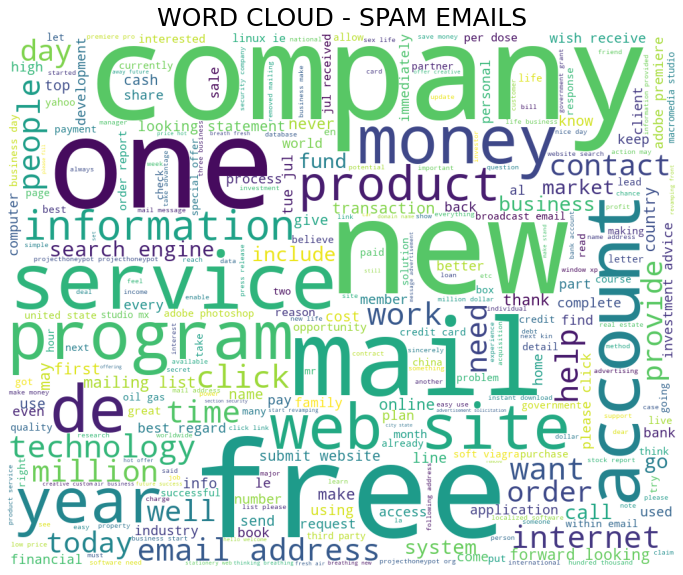

In [52]:
#Wordcloud - SPAM EMAILS
wordcloud = WordCloud(
    background_color='white',
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df_spam['preprocessed_email'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - SPAM EMAILS",fontsize=25)
plt.axis('off')
plt.show()

In [70]:
#Lista de palabras más comunes - SPAM EMAILS
words = nltk.tokenize.word_tokenize(df_spam['preprocessed_email'].str.cat(sep=' '))
word_dist = nltk.FreqDist(words)
print (word_dist)
df_spam_commonwords = pd.DataFrame(word_dist.most_common(15),
                    columns=['Word', 'Frequency'])
print(df_spam_commonwords)

<FreqDist with 18744 samples and 177890 outcomes>
           Word  Frequency
0           com       1179
1       company       1174
2      business        955
3         email        943
4   information        842
5          http        778
6          mail        737
7         money        736
8          free        681
9        please        675
10          get        670
11          one        659
12         time        639
13          www        597
14        click        582


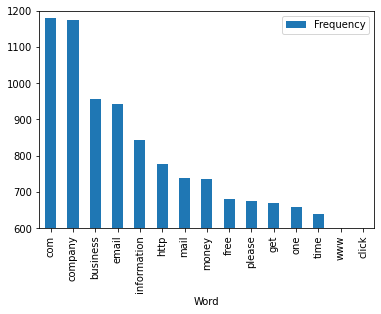

In [75]:
#Gráfico de Frecuencia de Palabras - SPAM EMAILS
df_spam_commonwords.plot(x ='Word', y='Frequency', kind = 'bar')
plt.ylim(600,1200)
plt.show()

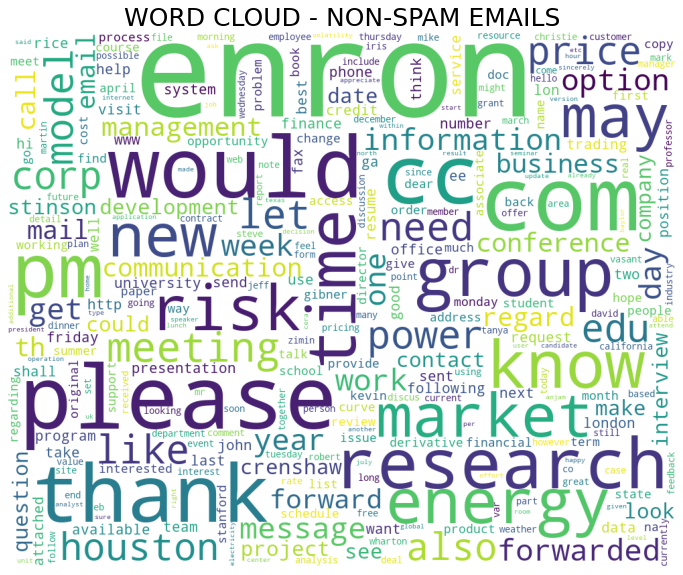

In [54]:
#Wordcloud - NON-SPAM EMAILS
wordcloud = WordCloud(collocations=False,
    stopwords=['ect', 'hou', 'vince', 'kaminski', 'shirley'],
    background_color='white',
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df_ham['preprocessed_email'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - NON-SPAM EMAILS",fontsize=25)
plt.axis('off')
plt.show()

In [81]:
#Lista de palabras más comunes - NON-SPAM EMAILS
words = nltk.tokenize.word_tokenize(df_ham['preprocessed_email'].str.cat(sep=' '))
stopwords=['ect', 'hou', 'vince', 'kaminski', 'shirley']
new_words = list(filter(lambda w: w not in stopwords, words))
word_dist = nltk.FreqDist(new_words)
print (word_dist)
df_ham_commonwords = pd.DataFrame(word_dist.most_common(15),
                    columns=['Word', 'Frequency'])
print(df_ham_commonwords)

<FreqDist with 21940 samples and 571863 outcomes>
        Word  Frequency
0      enron      13214
1        com       4422
2     please       4386
3      would       4081
4         cc       3887
5         pm       3262
6   research       2676
7     thanks       2523
8      group       2453
9       time       2448
10      know       2327
11    energy       2094
12      risk       2093
13    market       1964
14       may       1963


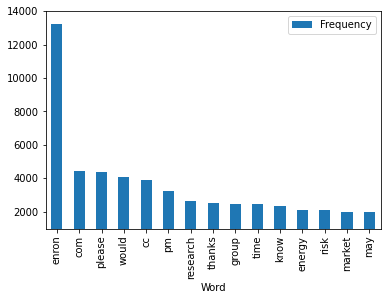

In [84]:
#Gráfico de Frecuencia de Palabras - NON-SPAM EMAILS
df_ham_commonwords.plot(x ='Word', y='Frequency', kind = 'bar')
plt.ylim(1000,14000)
plt.show()